<a href="https://colab.research.google.com/github/JavZon/Regression-Algorithms/blob/main/LR_using_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


we will drop 'Договорная' from price column

In [40]:
ind=df[df['price'] == 'Договорная'].index
df.drop(index=ind, inplace=True)

In [41]:
df.shape
df.isnull().sum()

location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

In [42]:
df['district'].value_counts()

district
Чиланзарский         1631
Мирзо-Улугбекский    1368
Юнусабадский          877
Учтепинский           875
Мирабадский           772
Яккасарайский         650
Яшнободский           469
Шайхантахурский       374
Олмазорский           267
Сергелийский          160
Янгихаётский           15
Бектемирский            8
Name: count, dtype: int64

In [44]:
df3=df.copy()
df=df[df['district']=='Чиланзарский']
df.head()

,location,district,rooms,size,level,max_levels,price
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
5,"город Ташкент, Чиланзарский район, Чиланзар 6-...",Чиланзарский,1,28,1,4,25500
6,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,1,30,2,4,21200


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1631 entries, 2 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    1631 non-null   object
 1   district    1631 non-null   object
 2   rooms       1631 non-null   int64 
 3   size        1631 non-null   object
 4   level       1631 non-null   int64 
 5   max_levels  1631 non-null   int64 
 6   price       1631 non-null   object
dtypes: int64(3), object(4)
memory usage: 101.9+ KB


In [46]:
df['size']=df['size'].astype(float)
df['price']=df['price'].astype(float)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1631 entries, 2 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    1631 non-null   object 
 1   district    1631 non-null   object 
 2   rooms       1631 non-null   int64  
 3   size        1631 non-null   float64
 4   level       1631 non-null   int64  
 5   max_levels  1631 non-null   int64  
 6   price       1631 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 101.9+ KB


In [49]:
df.shape

(1631, 7)

In [20]:
from sklearn.model_selection import train_test_split
X_train,  X_test ,Y_train_label, Y_test_label=train_test_split(df['size'].copy(),df['price'].copy(),test_size=0.1, random_state=42)

In [21]:
print(X_train.shape)
print(Y_train_label.shape)
print(X_test.shape)
print(Y_test_label.shape)

(1467,)
(1467,)
(164,)
(164,)


In [22]:
print(X_train.head(2))
print(Y_train_label.head(2))
print(X_test.head(2))
print(Y_test_label.head(2))

6904    50.0
6831    32.0
Name: size, dtype: float64
6904    33500.0
6831    24500.0
Name: price, dtype: float64
6319    46.0
5980    58.0
Name: size, dtype: float64
6319    34500.0
5980    35500.0
Name: price, dtype: float64


Now we reshape our X_train, X_test and labels to 2D array so that we can fit it to our model

In [23]:
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

In [24]:
from sklearn.linear_model import LinearRegression

LR_model=LinearRegression()
LR_model.fit(X_train, Y_train_label)

LinearRegression()

In [35]:
# slope
slope =LR_model.coef_[0]
# y=c+mx
m=slope
# The intercept
intercept =LR_model.intercept_
c=intercept
print(m, c)

925.2655016085992 -5583.359227430541


Now  we will create a scatterplot with 'size' and price columns and we also draw a plot and use our intercept and slope

In [38]:
df2=df.copy()
df2.head()

,location,district,rooms,size,level,max_levels,price
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000.0
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500.0
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000.0
5,"город Ташкент, Чиланзарский район, Чиланзар 6-...",Чиланзарский,1,28.0,1,4,25500.0
6,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,1,30.0,2,4,21200.0


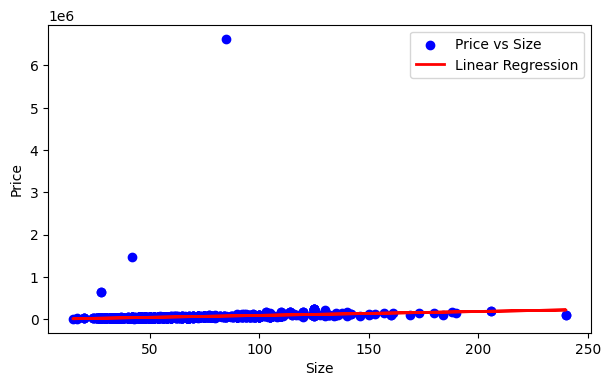

In [50]:
plt.figure(figsize=(7, 4))
plt.scatter(data=df, x='size', y='price', color='blue', label='Price vs Size')
plt.plot(X_train, m*X_train+c, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.show()

Now we predict

In [51]:
y_pred=LR_model.predict(X_test)

In [53]:
Y_test_label[:5]

6319    34500.0
5980    35500.0
6864    27000.0
1016    45000.0
5166    36500.0
Name: price, dtype: float64

In [52]:
y_pred[:5]

array([36978.85384657, 48082.03986587, 22174.60582083, 64736.81889482,
       48082.03986587])

Now

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

MAE=mean_absolute_error(Y_test_label, y_pred)
MSE=mean_squared_error(Y_test_label, y_pred)
RMSE=np.sqrt(MSE)
print("MAE =", MAE)
print("MSE =", MSE)
print("RMSE =", RMSE)

MAE = 19510.929517905806
MSE = 12930728191.592415
RMSE = 113713.35977620402
